In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
data = pd.read_csv("king.csv")
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values



In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[("encoder", OneHotEncoder() , [3])] , remainder="passthrough" )
x = np.array(ct.fit_transform(x))

In [17]:
from sklearn.impute import SimpleImputer
impute = SimpleImputer(missing_values = np.nan , strategy="mean")


x[:,-3:] = impute.fit_transform(x[:,-3:])
if pd.isnull(y).any():
    y = impute.fit_transform(y.reshape(-1, 1)).ravel() # check is any is null convert in 2d replace with mean convert bck reval in 1d

In [18]:
y

array([114968, 121875, 199440, 180889,  87638, 172557, 126458, 162391,
        94597, 107771, 153730,  83167, 179975, 152973,  98859, 170583,
       162126, 147021,  92609, 142920, 161190,  95649, 191778, 151861,
       140660, 116976,  95291, 108776, 112329, 153820, 170423, 180125,
       163574, 148297, 112663, 133364,  84647, 190527,  91558, 126536,
       142911, 134239, 110564,  93897,  98972, 127500, 184393, 174429,
       193346, 156609])

In [19]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2 , random_state=0)

In [20]:
x

array([[1.0, 0.0, 0.0, 68000.0, 139494.0, 213051.0],
       [0.0, 0.0, 1.0, 79082.0, 173566.0, 214354.0],
       [1.0, 0.0, 0.0, 105557.0, 130617.0, 106679.0],
       [1.0, 0.0, 0.0, 94739.0, 138949.0, 170790.0],
       [0.0, 1.0, 0.0, 98125.0, 146385.0, 53425.0],
       [0.0, 1.0, 0.0, 80113.0, 148886.0, 65063.0],
       [0.0, 0.0, 1.0, 54798.0, 134441.0, 194042.0],
       [0.0, 1.0, 0.0, 137129.0, 134982.0, 195761.0],
       [0.0, 1.0, 0.0, 107757.0, 176047.0, 213976.0],
       [0.0, 1.0, 0.0, 127463.0, 108643.0, 272441.0],
       [0.0, 0.0, 1.0, 55368.0, 116859.0, 247290.0],
       [1.0, 0.0, 0.0, 73577.0, 177789.0, 174559.0],
       [0.0, 1.0, 0.0, 89953.0, 157156.0, 186389.0],
       [0.0, 1.0, 0.0, 128459.0, 189604.0, 222638.0],
       [1.0, 0.0, 0.0, 132403.0, 131296.0, 175126.0],
       [1.0, 0.0, 0.0, 100893.0, 119078.0, 164454.0],
       [1.0, 0.0, 0.0, 137711.0, 113162.0, 106591.0],
       [1.0, 0.0, 0.0, 91529.0, 139333.0, 288436.0],
       [1.0, 0.0, 0.0, 85169.0, 112210.0

In [21]:
from sklearn.linear_model import LinearRegression
regressor  = LinearRegression()
regressor.fit(x_train , y_train)

LinearRegression()

In [22]:
y_pred = regressor.predict(x_test)
np.set_printoptions(precision = 2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))


[[138653.71 112329.  ]
 [147547.05  83167.  ]
 [140785.93 153730.  ]
 [140364.51 134239.  ]
 [149879.83 199440.  ]
 [142314.69 108776.  ]
 [140582.15  91558.  ]
 [148777.67 180125.  ]
 [144410.99 191778.  ]
 [143472.18  87638.  ]]


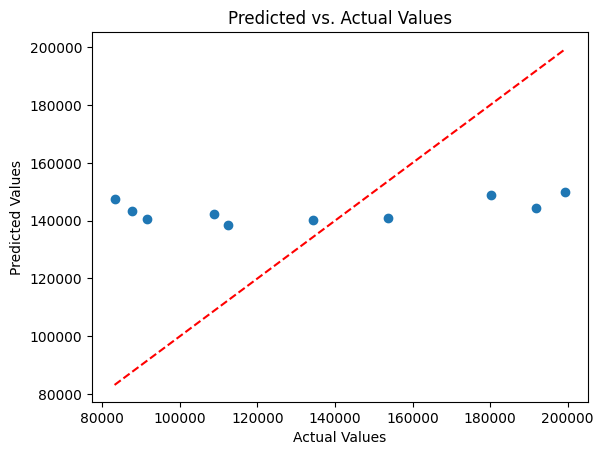

In [23]:
import matplotlib.pyplot as plt

# Assuming you have y_pred (predicted values) and y_test (actual values) from your code

plt.scatter(y_test, y_pred)  # Create a scatter plot
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Add a diagonal line for reference
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual Values")
plt.show()  # Display the plot

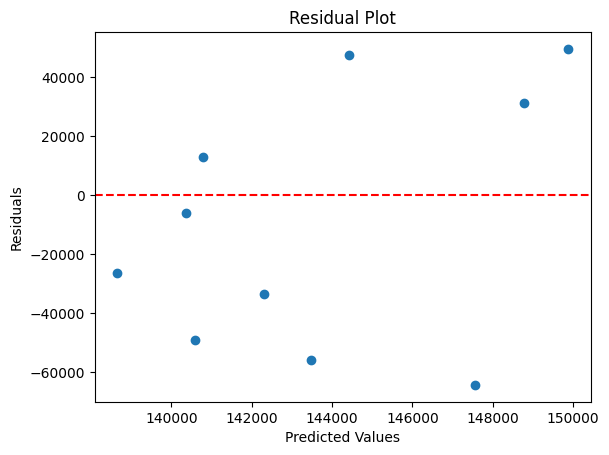

In [12]:

import matplotlib.pyplot as plt


residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()